In [1]:
import pandas as pd
import numpy as np

In [2]:
from os.path import join

In [3]:
import altair as alt # Python wrapper for Vega-Lite visualisation grammar

In [4]:
DATA_DIR = "../exp_results/output/"

In [5]:
proj_imports2 = pd.read_csv(join(DATA_DIR, "results_imports_python2.csv"))
proj_imports2

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
44211,40576835,40576835/api_benchmarks.py,api_benchmarks,settings,False
44212,40576835,40576835/api_benchmarks.py,api_benchmarks,time,False
44213,40576835,40576835/api_benchmarks.py,api_benchmarks,urllib,False
44214,40576835,40576835/api_benchmarks.py,api_benchmarks,urllib2,False


In [6]:
proj_imports2.nunique()

repo             222
path            7941
module_name     6635
import_name    10903
parse_error        2
dtype: int64

In [7]:
proj_imports3 = pd.read_csv(join(DATA_DIR, "results_imports_python3.csv"))
proj_imports3

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
43599,88318858,88318858/batchgen.py,NaN,NaN,True
43600,88318858,88318858/train.py,NaN,NaN,True
43601,40576835,40576835/get_accuracies.py,NaN,NaN,True
43602,40576835,40576835/api_benchmarks.py,NaN,NaN,True


In [8]:
proj_imports3.nunique()

repo             222
path            7941
module_name     6427
import_name    10460
parse_error        2
dtype: int64

In [9]:
proj_imports_all = pd.concat([proj_imports2, proj_imports3], ignore_index=True)

In [10]:
proj_imports_all

,repo,path,module_name,import_name,parse_error
0,72225778,72225778/predict.py,predict,data_helper,False
1,72225778,72225778/predict.py,predict,json,False
2,72225778,72225778/predict.py,predict,logging,False
3,72225778,72225778/predict.py,predict,numpy,False
4,72225778,72225778/predict.py,predict,os,False
...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True
87816,88318858,88318858/train.py,NaN,NaN,True
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True


In [11]:
#proj_imports_all_filt = proj_imports_all[~proj_imports_all["import_name"].isna()]

In [12]:
#proj_imports_all_filt

In [13]:
proj_imports_all["module_short_name"] = proj_imports_all["import_name"].apply(lambda x: x.split(".")[0] if not pd.isnull(x) else "")

In [14]:
proj_imports_all

,repo,path,module_name,import_name,parse_error,module_short_name
0,72225778,72225778/predict.py,predict,data_helper,False,data_helper
1,72225778,72225778/predict.py,predict,json,False,json
2,72225778,72225778/predict.py,predict,logging,False,logging
3,72225778,72225778/predict.py,predict,numpy,False,numpy
4,72225778,72225778/predict.py,predict,os,False,os
...,...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True,
87816,88318858,88318858/train.py,NaN,NaN,True,
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True,
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True,


In [15]:
# Example:
#list(proj_imports_all[proj_imports_all["repo"] == 21467110]["import_name"])

In [16]:
# Example
# proj_imports_all[proj_imports_all["module_short_name"] == "pos"]

In [17]:
# popularity of imports (based on number of *repos* that use them)
popular_imports = proj_imports_all.groupby(["module_short_name"])["repo"].nunique().sort_values(ascending=False)
popular_imports

module_short_name
                   190
os                 178
sys                162
re                 148
numpy              122
                  ... 
mnnl                 1
mmap                 1
mkl                  1
mixup                1
manual_analyses      1
Name: repo, Length: 1399, dtype: int64

In [18]:
import pandas
popular_imports.to_csv("popular.csv", header=True)

In [19]:
proj_imports3["parse_error"].value_counts()

False    42615
True       989
Name: parse_error, dtype: int64

In [20]:
unsplit2 = proj_imports2.groupby(["repo", "path", "parse_error"]).agg(lambda x: ";".join([str(i) for i in x if not pd.isna(i)]))
unsplit2
unsplit_flat2 = pd.DataFrame(unsplit2.to_records())
unsplit_flat2

,repo,path,parse_error,module_name,import_name
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy
2,41590,41590/nlp/crp.py,False,crp,datetime
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk


In [21]:
unsplit3 = proj_imports3.groupby(["repo", "path", "parse_error"]).agg(lambda x: ";".join([str(i) for i in x if not pd.isna(i)]))
unsplit_flat3 = pd.DataFrame(unsplit3.to_records())
unsplit_flat3

,repo,path,parse_error,module_name,import_name
0,41590,41590/nlp/counter.py,True,,
1,41590,41590/nlp/countermap.py,True,,
2,41590,41590/nlp/crp.py,True,,
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk


In [22]:
joined = pd.merge(unsplit_flat2, unsplit_flat3,
                  how='outer',
                  on=['repo', 'path'],
                  suffixes=('2', '3'))
joined

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random,True,,
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy,True,,
2,41590,41590/nlp/crp.py,False,crp,datetime,True,,
3,41590,41590/nlp/cythonsetup.py,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...,False,cythonsetup;cythonsetup;cythonsetup,Cython.Distutils.build_ext;distutils.core;dist...
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
...,...,...,...,...,...,...,...,...
7936,119537109,119537109/utils/oracle/OracleLstm.py,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...,False,utils.oracle.OracleLstm;utils.oracle.OracleLst...,numpy;tensorflow;tensorflow.python.ops.control...
7937,119537109,119537109/utils/oracle/OracleSru.py,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...,False,utils.oracle.OracleSru;utils.oracle.OracleSru;...,numpy;tensorflow;tensorflow.python.ops.control...
7938,119537109,119537109/utils/oracle/__init__.py,False,utils.oracle.__init__,,False,utils.oracle.__init__,
7939,119537109,119537109/utils/text_process.py,False,utils.text_process,nltk,False,utils.text_process,nltk


In [23]:
joined["repo"].value_counts()

104676745    880
91356408     682
43172794     644
590142       632
21467110     618
            ... 
9651619        1
33157461       1
12161605       1
89879629       1
69533102       1
Name: repo, Length: 222, dtype: int64

In [24]:
joined[joined["import_name2"] != joined["import_name3"]]

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
0,41590,41590/nlp/counter.py,False,counter;counter;counter;counter;counter,collections;math;nlp.counter;os;random,True,,
1,41590,41590/nlp/countermap.py,False,countermap;countermap;countermap;countermap;co...,copy;counter;itertools;math;numpy,True,,
2,41590,41590/nlp/crp.py,False,crp,datetime,True,,
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
7,41590,41590/nlp/gaussian_clusters.py,False,gaussian_clusters;gaussian_clusters;gaussian_c...,counter;countermap;crp;distributions;itertools...,True,,
...,...,...,...,...,...,...,...,...
7775,114098658,114098658/trandition.py,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...
7825,115672915,115672915/njunmt/tools/deseg.py,False,njunmt.tools.deseg;njunmt.tools.deseg,re;sys,True,,
7905,119537109,119537109/models/rankgan/RankganDiscriminator.py,True,,,False,models.rankgan.RankganDiscriminator;models.ran...,numpy;tensorflow;tensorflow.python.ops.control...
7927,119537109,119537109/utils/metrics/DocEmbSim.py,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...


In [25]:
inconsistent = joined[(joined["import_name2"] != joined["import_name3"]) & ~joined["parse_error2"] & ~joined["parse_error3"]]
inconsistent

,repo,path,parse_error2,module_name2,import_name2,parse_error3,module_name3,import_name3
4,41590,41590/nlp/distributions.py,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...,False,distributions;distributions;distributions;dist...,countermap;future_math.gaussian_cdf;lib.mvncdf...
21,41590,41590/nlp/test-maxent.py,False,test-maxent;test-maxent;test-maxent;test-maxen...,counter;countermap;itertools;math;maxent;maxim...,False,test-maxent;test-maxent;test-maxent;test-maxen...,counter;countermap;itertools;math.exp;math.log...
27,41590,41590/nlp/test_naivebayes.py,False,test_naivebayes;test_naivebayes;test_naivebaye...,counter;math;naivebayes;unittest,False,test_naivebayes;test_naivebayes;test_naivebaye...,counter;math.log;naivebayes;unittest
39,118130,118130/clustering/dpm.py,False,dpm;dpm;dpm;dpm;dpm;dpm;dpm;dpm,csv;numpy;numpy.linalg.det;numpy.linalg.slogde...,False,dpm;dpm;dpm;dpm;dpm;dpm,csv;numpy;numpy.linalg;optparse;scipy.special;...
40,118130,118130/clustering/irm.py,False,irm;irm;irm;irm;irm;irm,copy;numpy;numpy.concatenate;numpy.random.bino...,False,irm;irm;irm;irm,copy;numpy;numpy.random;scipy.special
...,...,...,...,...,...,...,...,...
7742,114098658,114098658/dataloader/sst.py,False,dataloader.sst;dataloader.sst;dataloader.sst;d...,codecs;dataloader;dataloader.Dataset;numpy;opt...,False,dataloader.sst;dataloader.sst;dataloader.sst;d...,codecs;dataloader;dataloader.Dataset;numpy;opt...
7765,114098658,114098658/models/LSTMwithAttention.py,False,models.LSTMwithAttention;models.LSTMwithAttent...,models.BaseModel.BaseModel;numpy;sklearn.utils...,False,models.LSTMwithAttention;models.LSTMwithAttent...,models.BaseModel.BaseModel;numpy;sklearn.utils...
7775,114098658,114098658/trandition.py,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...,False,trandition;trandition;trandition;trandition;tr...,dataHelper;numpy;opts;sklearn.feature_extracti...
7927,119537109,119537109/utils/metrics/DocEmbSim.py,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...,False,utils.metrics.DocEmbSim;utils.metrics.DocEmbSi...,collections;math;nltk;numpy;random;scipy.spati...


In [26]:
inconsistent.loc[39].import_name2

'csv;numpy;numpy.linalg.det;numpy.linalg.slogdet;numpy.log;optparse;scipy.special.gammaln;sklearn.datasets'

In [27]:
inconsistent.loc[39].import_name3

'csv;numpy;numpy.linalg;optparse;scipy.special;sklearn.datasets'

Upon further testing, it seems that the differences are due to the environment. If install scipy in py2 env (or uninstall scipy in py3 env), will get the same (or at least similar) results!

# Do some repos import the same module twice?

In [28]:
def import_count(proj_imports_df):
    df_import_counts = proj_imports_df.groupby(["repo", "path", "import_name"]).count()
    df_import_counts_flat = pd.DataFrame(df_import_counts.to_records())
    return df_import_counts_flat.sort_values("module_name")

In [29]:
import_count(proj_imports2)

,repo,path,import_name,module_name,parse_error
0,41590,41590/nlp/counter.py,collections,1,1
28343,48450890,48450890/sentiment_analysis.py,lib.classifier,1,1
28344,48450890,48450890/sentiment_analysis.py,lib.examples,1,1
28345,48450890,48450890/sentiment_analysis.py,threading,1,1
28346,52581991,52581991/snorkel/__init__.py,snorkel.version,1,1
...,...,...,...,...,...
14176,21467110,21467110/bin/ud/ud_train.py,json,1,1
14177,21467110,21467110/bin/ud/ud_train.py,pathlib.Path,1,1
14178,21467110,21467110/bin/ud/ud_train.py,plac,1,1
14180,21467110,21467110/bin/ud/ud_train.py,re,1,1


In [30]:
import_count(proj_imports3)

,repo,path,import_name,module_name,parse_error
0,41590,41590/nlp/cythonsetup.py,Cython.Distutils.build_ext,1,1
27738,91356408,91356408/allennlp/common/configuration.py,torch,1,1
27739,91356408,91356408/allennlp/common/configuration.py,typing,1,1
27740,91356408,91356408/allennlp/common/file_utils.py,allennlp.common.tqdm.Tqdm,1,1
27741,91356408,91356408/allennlp/common/file_utils.py,boto3,1,1
...,...,...,...,...,...
13874,33648012,33648012/rules/emacs/Snippet.py,EventLoop.getLoop,1,1
13875,33648012,33648012/rules/emacs/Snippet.py,EventLoop.pushEvent,1,1
13876,33648012,33648012/rules/emacs/Snippet.py,mdlog,1,1
13858,33648012,33648012/rules/emacs/Rust.py,rules.emacs.Cmd.Cmd,1,1


Surprisingly, imports only occur at most once. This is because `findimports` will only list the import once, even if imported multiple times. It also appears to sort the imports alphabetically.

# Annotated Libs

In [31]:
annotated_libs = pd.read_csv("popular_manually_annotated_v2_export.csv")

In [32]:
# list of ML related libraries imported by 2 or more projects
ml_libs = list(annotated_libs[annotated_libs["isML"] == "Y"]["module_short_name"])
ml_libs

['sklearn',
 'tensorflow',
 'keras',
 'torch',
 'theano',
 'tflearn',
 'pytorch_pretrained_bert',
 'xgboost',
 'apex']

In [33]:
import_sets = []
proj_imports_grouped = proj_imports_all.groupby("repo")
for repo,repo_df in proj_imports_grouped:
    libs_set = tuple(sorted(set(repo_df["module_short_name"]) & set(ml_libs))) # empty tuple if none
    import_sets.append([repo, libs_set])

import_sets_df = pd.DataFrame.from_records(import_sets, columns=["repo", "importset"])

In [34]:
import_sets_df

,repo,importset
0,41590,()
1,118130,"(sklearn, tensorflow)"
2,550482,()
3,590142,()
4,607040,()
...,...,...
217,112664267,"(apex, sklearn, torch)"
218,114098658,"(pytorch_pretrained_bert, sklearn, torch)"
219,115672915,"(tensorflow,)"
220,118248283,"(torch,)"


In [35]:
import_sets_df.groupby("importset").count().sort_values("repo", ascending=False)

,repo
importset,
(),116
"(sklearn,)",28
"(tensorflow,)",20
"(sklearn, tensorflow)",11
"(torch,)",9
"(keras,)",5
"(keras, sklearn)",4
"(theano,)",4
"(tensorflow, tflearn)",3


In [36]:
popular_imports_df = pd.DataFrame({"lib": popular_imports.index, "cnt": popular_imports.values})
popular_imports_df["lib"] = popular_imports_df["lib"].replace('', 'None')
popular_imports_df

,lib,cnt
0,None,190
1,os,178
2,sys,162
3,re,148
4,numpy,122
...,...,...
1394,mnnl,1
1395,mmap,1
1396,mkl,1
1397,mixup,1


In [37]:
num_repos = proj_imports_all.nunique()["repo"]
num_repos 

222

In [38]:
popular_imports_df_ml = popular_imports_df[popular_imports_df["lib"].isin(ml_libs)]
popular_imports_df_ml

,lib,cnt
17,sklearn,57
25,tensorflow,42
48,keras,21
57,torch,18
73,theano,12
246,tflearn,3
293,pytorch_pretrained_bert,2
296,apex,2
375,xgboost,2


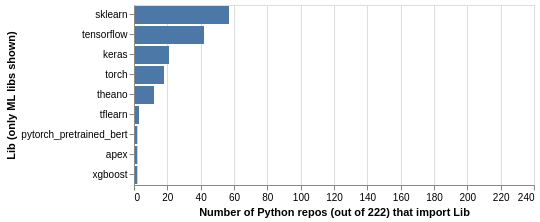

In [39]:
chart = alt.Chart(popular_imports_df_ml).mark_bar().encode(
    x = alt.X('cnt', type='quantitative', title="Number of Python repos (out of %s) that import Lib" % num_repos, scale=alt.Scale(domain=(0,int(num_repos)))),
    y = alt.Y('lib', type='nominal', title="Lib (only ML libs shown)", sort=alt.EncodingSortField(order="descending")),
)
chart

In [40]:
chart.save("imports.png")

In [41]:
import import_graph

In [42]:
proj_imports_test = proj_imports_all[proj_imports_all["path"].str.contains("test") | proj_imports_all["import_name"].str.contains("test")]

In [43]:
proj_imports_test


,repo,path,module_name,import_name,parse_error,module_short_name
34,72225778,72225778/train.py,train,sklearn.model_selection.train_test_split,False,sklearn
53,118248283,118248283/test_speech_commands.py,test_speech_commands,argparse,False,argparse
54,118248283,118248283/test_speech_commands.py,test_speech_commands,csv,False,csv
55,118248283,118248283/test_speech_commands.py,test_speech_commands,datasets,False,datasets
56,118248283,118248283/test_speech_commands.py,test_speech_commands,os,False,os
...,...,...,...,...,...,...
87802,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,dcnn,False,dcnn
87803,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,dcnn_train,False,dcnn_train
87804,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,numpy,False,numpy
87805,29187367,29187367/test_numpy_embedding.py,test_numpy_embedding,test_util,False,test_util


In [44]:
pd.Series(proj_imports_test["path"].unique())

0                            72225778/train.py
1            118248283/test_speech_commands.py
2                    118248283/test_cifar10.py
3                  8408538/tests/test_utils.py
4                    8408538/tests/__init__.py
                         ...                  
1617                     29187367/test_util.py
1618            29187367/test_learning_rate.py
1619          29187367/test_numpy_embedding.py
1620        91356408/scripts/train_fixtures.py
1621    91356408/allennlp/commands/__init__.py
Length: 1622, dtype: object

In [45]:
# Decided not to strip out tests (while we want to remove unittests, we might accidentally remove ml model 'tests' (in sense of train/test) too)

In [46]:
# https://docs.python-guide.org/writing/tests/
# Initially just used "unittest", but some projects use other frameworks, e.g. spacy uses pytest

In [47]:
# As pytest just uses assert statements, some tests might not actually import pytest.
# e.g. 21467110/spacy/tests/regression/test_issue3531.py
# https://docs.pytest.org/en/latest/
test_frameworks = ["unittest", "pytest", "unittest2", "mock"]

In [48]:
unittests = proj_imports_all[proj_imports_all["module_short_name"].isin(test_frameworks)]
unittests

,repo,path,module_name,import_name,parse_error,module_short_name
497,19346982,19346982/test/test_komoran.py,test_komoran,pytest,False,pytest
501,19346982,19346982/test/test_kkma.py,test_kkma,pytest,False,pytest
504,19346982,19346982/test/test_hannanum.py,test_hannanum,pytest,False,pytest
506,19346982,19346982/test/test_openkoreantext.py,test_openkoreantext,pytest,False,pytest
514,19346982,19346982/test/test_mecab.py,test_mecab,pytest,False,pytest
...,...,...,...,...,...,...
87679,8373425,8373425/tests/test_pystemmer.py,test_pystemmer,unittest,False,unittest
87689,32617150,32617150/tests/categories.py,tests.categories,unittest,False,unittest
87691,32617150,32617150/tests/category.py,tests.category,unittest,False,unittest
87694,32617150,32617150/tests/__init__.py,tests.__init__,mock,False,mock


In [49]:
paths_unittests = unittests.path.unique()
pd.Series(paths_unittests)

0                          19346982/test/test_komoran.py
1                             19346982/test/test_kkma.py
2                         19346982/test/test_hannanum.py
3                   19346982/test/test_openkoreantext.py
4                            19346982/test/test_mecab.py
                             ...                        
755     52581991/test/labeling/model/test_label_model.py
756        52581991/test/labeling/preprocess/test_nlp.py
757    38108816/orangecontrib/text/tests/test_twitter.py
758    38108816/orangecontrib/text/tests/test_topic_m...
759        38108816/orangecontrib/text/tests/test_nyt.py
Length: 760, dtype: object

In [50]:
proj_imports_filt = proj_imports_all[~proj_imports_all["path"].isin(paths_unittests)]

In [51]:
proj_imports_filt

,repo,path,module_name,import_name,parse_error,module_short_name
0,72225778,72225778/predict.py,predict,data_helper,False,data_helper
1,72225778,72225778/predict.py,predict,json,False,json
2,72225778,72225778/predict.py,predict,logging,False,logging
3,72225778,72225778/predict.py,predict,numpy,False,numpy
4,72225778,72225778/predict.py,predict,os,False,os
...,...,...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,NaN,True,
87816,88318858,88318858/train.py,NaN,NaN,True,
87817,40576835,40576835/get_accuracies.py,NaN,NaN,True,
87818,40576835,40576835/api_benchmarks.py,NaN,NaN,True,


In [52]:
# Decided to strip out unittests

In [53]:
proj_imports_all_sanitized = import_graph.sanitize_modules(proj_imports_filt)

In [54]:
processed_df = import_graph.process_repos(proj_imports_all_sanitized, ml_libs)

In [55]:
#processed_df.to_csv("processed_df.csv")

In [56]:
processed_df[processed_df["hops"] == 0]

,path,module_name,hops,repo
0,118130/activelearn/mmms.py,mmms,0.0,118130
1,118130/activelearn/mmpm.py,mmpm,0.0,118130
2,118130/activelearn/oracle.py,oracle,0.0,118130
3,118130/activelearn/qbc4.py,qbc4,0.0,118130
4,118130/activelearn/qbc_dist.py,qbc_dist,0.0,118130
...,...,...,...,...
55,119537109/utils/metrics/DocEmbSim.py,utils.metrics.DocEmbSim,0.0,119537109
63,119537109/utils/oracle/OracleGru.py,utils.oracle.OracleGru,0.0,119537109
64,119537109/utils/oracle/OracleLstm.py,utils.oracle.OracleLstm,0.0,119537109
65,119537109/utils/oracle/OracleSru.py,utils.oracle.OracleSru,0.0,119537109


In [57]:
processed_df[processed_df["hops"] == 1]

,path,module_name,hops,repo
4,3932246/sentiment_analysis.py,3932246.sentiment_analysis,1.0,3932246
5,10404901/extractor.py,extractor,1.0,10404901
0,19057465/examples/audio_transcribe.py,audio_transcribe,1.0,19057465
1,19057465/examples/background_listening.py,background_listening,1.0,19057465
2,19057465/examples/calibrate_energy_threshold.py,calibrate_energy_threshold,1.0,19057465
...,...,...,...,...
21,119537109/models/mle/Mle.py,models.mle.Mle,1.0,119537109
26,119537109/models/pg_bleu/Pgbleu.py,models.pg_bleu.Pgbleu,1.0,119537109
32,119537109/models/rankgan/Rankgan.py,models.rankgan.Rankgan,1.0,119537109
39,119537109/models/seqgan/Seqgan.py,models.seqgan.Seqgan,1.0,119537109


In [58]:
processed_df[processed_df["hops"] == 2]

,path,module_name,hops,repo
46,21467110/spacy/__init__.py,spacy.__init__,2.0,21467110
77,21467110/spacy/lang/af/__init__.py,spacy.lang.af.__init__,2.0,21467110
79,21467110/spacy/lang/ar/__init__.py,spacy.lang.ar.__init__,2.0,21467110
85,21467110/spacy/lang/bg/__init__.py,spacy.lang.bg.__init__,2.0,21467110
88,21467110/spacy/lang/bn/__init__.py,spacy.lang.bn.__init__,2.0,21467110
...,...,...,...,...
9,95985462/trdg/generators/from_wikipedia.py,trdg.generators.from_wikipedia,2.0,95985462
0,103471501/__main__.py,__main__,2.0,103471501
1,112664267/configure_data.py,configure_data,2.0,112664267
3,114098658/dataloader/ag.py,dataloader.ag,2.0,114098658


In [59]:
processed_df[processed_df["hops"] == 3]

,path,module_name,hops,repo
2,21467110/bin/train_word_vectors.py,bin.train_word_vectors,3.0,21467110
5,21467110/bin/ud/ud_run_test.py,bin.ud.ud_run_test,3.0,21467110
13,21467110/bin/wiki_entity_linking/wikidata_pret...,bin.wiki_entity_linking.wikidata_pretrain_kb,3.0,21467110
15,21467110/bin/wiki_entity_linking/wikidata_trai...,bin.wiki_entity_linking.wikidata_train_entity_...,3.0,21467110
18,21467110/examples/information_extraction/entit...,entity_relations,3.0,21467110
19,21467110/examples/information_extraction/parse...,parse_subtrees,3.0,21467110
20,21467110/examples/information_extraction/phras...,phrase_matcher,3.0,21467110
23,21467110/examples/load_from_docbin.py,load_from_docbin,3.0,21467110
27,21467110/examples/pipeline/custom_sentence_seg...,custom_sentence_segmentation,3.0,21467110
28,21467110/examples/pipeline/fix_space_entities.py,fix_space_entities,3.0,21467110


In [60]:
processed_df[processed_df["hops"] == 4]

,path,module_name,hops,repo
53,21467110/spacy/cli/convert.py,spacy.cli.convert,4.0,21467110
54,21467110/spacy/cli/converters/__init__.py,spacy.cli.converters.__init__,4.0,21467110
57,21467110/spacy/cli/converters/iob2json.py,spacy.cli.converters.iob2json,4.0,21467110


In [61]:
processed_df[processed_df["hops"] == 5]

,path,module_name,hops,repo


In [62]:
ml0 = processed_df[processed_df["hops"] == 0]["path"].unique()

In [63]:
ml1 = processed_df[processed_df["hops"] == 1]["path"].unique()

In [64]:
ml2 = processed_df[processed_df["hops"] == 2]["path"].unique()

In [65]:
ml3 = processed_df[processed_df["hops"] == 3]["path"].unique()

In [66]:
ml4 = processed_df[processed_df["hops"] == 4]["path"].unique()

In [67]:
test = paths_unittests

In [68]:
proj_labels = proj_imports_all[["repo", "path", "module_name"]].copy()

In [69]:
proj_labels["cat"] = "other"

In [70]:
proj_labels[proj_labels["path"].isin(ml0)] = "ml0"

In [71]:
proj_labels[proj_labels["path"].isin(ml1)] = "ml1"

In [72]:
proj_labels[proj_labels["path"].isin(ml2)] = "ml2"

In [73]:
proj_labels[proj_labels["path"].isin(ml3)] = "ml3"

In [74]:
proj_labels[proj_labels["path"].isin(ml4)] = "ml4"

In [75]:
proj_labels[proj_labels["path"].isin(test)] = "test"

In [76]:
proj_labels

,repo,path,module_name,cat
0,72225778,72225778/predict.py,predict,other
1,72225778,72225778/predict.py,predict,other
2,72225778,72225778/predict.py,predict,other
3,72225778,72225778/predict.py,predict,other
4,72225778,72225778/predict.py,predict,other
...,...,...,...,...
87815,88318858,88318858/batchgen.py,NaN,other
87816,88318858,88318858/train.py,NaN,other
87817,40576835,40576835/get_accuracies.py,NaN,other
87818,40576835,40576835/api_benchmarks.py,NaN,other


In [77]:
proj_labels["cat"].value_counts()

other    53776
ml0      19417
test     11410
ml1       1631
ml2       1062
ml3        490
ml4         34
Name: cat, dtype: int64

In [78]:
proj_labels.to_csv("proj_labels.csv", index=False)